## Bike Sharing Dataset Data Set

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Abstract: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

### Data Set Characteristics:  

### Univariate

##### Number of Instances: 17389
##### Area: Social
##### Attribute Characteristics: Integer, Real
##### Number of Attributes: 16
##### Date Donated 2013-12-20
##### Associated Tasks: Regression
##### Missing Values? N/A


#### Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### Objective - Regression: 

Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
        
#### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

We will use hour.csv, the file containing bike sharing counts aggregated on hourly basis. 
Records: 17379 hours

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

##### Link for the dataset
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [35]:
def RMSE(actual, predicted):
    return(np.sqrt(np.mean((actual-predicted)**2)))

def CV_RMSE(actual, predicted):
    return(RMSE(actual,predicted)/np.mean(actual))

def CV_RMSE2(actual, predicted):
    return(np.sqrt(np.mean((actual-predicted)**2))/np.mean(actual))

def RSquared(actual, predicted):
    return(1 - (np.sum((actual-predicted)**2)/np.sum((actual-np.mean(actual))**2)))

In [36]:
a = pd.Series([13, 18, 36, 19, 12, 7, 49, 8, 21, 21])
b =  pd.Series([1, 14, 37, 50, 45, 16, 24, 21, 21, 41])
print(RMSE(a,b))
print(CV_RMSE2(a,b))

18.670832868407345
0.9152369053140856


In [3]:
df = pd.read_csv('capstone_bike_sharing Group B/hour.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.shape

(17379, 17)

In [6]:
df1 = df
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
df1['day']= pd.to_datetime(df1.dteday).dt.day
df1['dteday'] = pd.to_datetime(df1.dteday)
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [8]:
df1.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
day                    int64
dtype: object

In [9]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

# Without Converting to dummy variables

In [10]:
X = df1.drop(['instant','dteday','cnt','registered','casual'],axis=1)
y = df1['cnt']

In [11]:
X.shape

(17379, 13)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### 1.Linear regression

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred_lr = lr.predict(X_train)
print("Train R Squared (Linear regression): ", RSquared(y_train, y_train_pred_lr))

Train R Squared (Linear regression):  0.3900336064839106


In [15]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_train_pred_rf = rf.predict(X_train)
print("Train R Squared (Randomforest): ", RSquared(y_train, y_train_pred_rf))

Train R Squared (Randomforest):  0.9891737219456335


In [16]:
y_test_pred_rf = rf.predict(X_test)

In [17]:
CV_RMSE(y_test, y_test_pred_rf)

0.24634192633404373

In [18]:
df1['rf_pred'] = rf.predict(X)
df1['lr_pred'] = lr.predict(X)

In [19]:
df1.to_csv("Predicted_DF.csv", index=False)

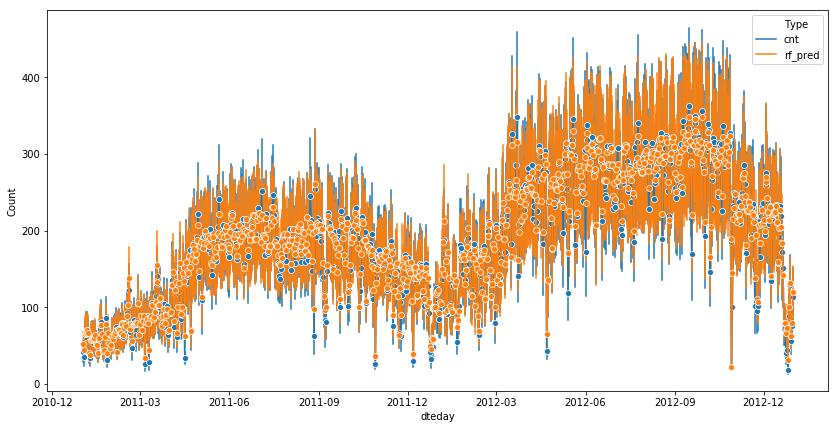

In [32]:
Prediction_DF = pd.melt(df1[['dteday', 'cnt', 'rf_pred']], 
                        id_vars=['dteday'], var_name="Type", value_name="Count")
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.lineplot(x="dteday", y="Count", hue="Type",  err_style="bars", marker='o', data=Prediction_DF)  

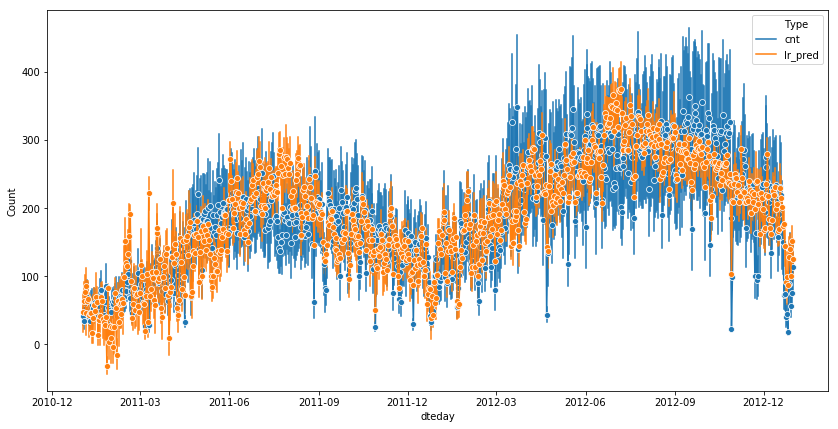

In [31]:
Prediction_DF = pd.melt(df1[['dteday', 'cnt', 'lr_pred']], 
                        id_vars=['dteday'], var_name="Type", value_name="Count")
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.lineplot(x="dteday", y="Count", hue="Type", err_style="bars", marker='o', data=Prediction_DF)  

#### Model building  using using dummy

In [20]:
df2 = df1.drop(['instant','dteday','cnt','registered','casual'],axis=1)
df2 = pd.get_dummies(columns=['weathersit', 'season', 'yr', 'mnth', 'hr', 'weekday', 'day', 'workingday','holiday'],data=df2,drop_first=False)
df2.head()

,temp,atemp,hum,windspeed,rf_pred,lr_pred,weathersit_1,weathersit_2,weathersit_3,weathersit_4,...,day_26,day_27,day_28,day_29,day_30,day_31,workingday_0,workingday_1,holiday_0,holiday_1
0,0.24,0.2879,0.81,0.0,28.3,-72.188338,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.22,0.2727,0.80,0.0,35.0,-67.911035,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0.22,0.2727,0.80,0.0,20.5,-60.308138,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.24,0.2879,0.75,0.0,16.0,-37.550377,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0.24,0.2879,0.75,0.0,3.9,-29.947480,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [21]:
X = df2
y = df.cnt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [22]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
y_train_pred_xgb = xgb.predict(X_train)
print("Train R Squared (XGboost): ", RSquared(y_train, y_train_pred_xgb))

Train R Squared (XGboost):  0.9907570384320751


In [28]:
y_test_pred_xgb = xgb.predict(X_test)
print("CV_RMSE: ", CV_RMSE(y_test, y_test_pred_xgb))
print("RMSE: ", RMSE(y_test, y_test_pred_xgb))

CV_RMSE:  0.24509128003077316
RMSE:  46.922711459976675


In [29]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_train_pred_rf = rf.predict(X_train)
print("Train R Squared (Randomforest): ", RSquared(y_train, y_train_pred_rf))

Train R Squared (Randomforest):  0.9978859721305277


In [30]:
y_test_pred_rf = rf.predict(X_test)
print("CV_RMSE: ", CV_RMSE(y_test, y_test_pred_rf))
print("RMSE: ", RMSE(y_test, y_test_pred_rf))

CV_RMSE:  0.24753285853334936
RMSE:  47.39015152381281


Differ

In [328]:
metrics.mean_squared_error(y_test,predict)

20676.729112695582

In [329]:
np.sqrt(metrics.mean_squared_error(y_test,predict))

143.79405103374611

In [330]:
metrics.r2_score(y_test,predict)

0.38569950468142467

In [331]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predict = rf.predict(X_test)
metrics.mean_squared_error(y_test,predict)

2374.2691369390104

In [332]:
np.sqrt(metrics.mean_squared_error(y_test,predict))

48.726472650285395

In [333]:
metrics.r2_score(y_test,predict)

0.9294610526214367

In [334]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
metrics.mean_squared_error(y_test,preds)

5482.098415568592

In [335]:
np.sqrt(metrics.mean_squared_error(y_test,preds))

74.0411940447248

In [336]:
metrics.r2_score(y_test,preds)

0.837128215313262

In [230]:
df2 = df1.drop(['instant','dteday','cnt','registered','casual'],axis=1)

In [231]:
df2.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day'],
      dtype='object')

In [232]:
df2.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
day             int64
dtype: object

In [233]:
df2 = pd.get_dummies(columns=['weathersit', 'season', 'yr', 'mnth', 'hr', 'weekday', 'day', 'workingday','holiday'],data=df2,drop_first=False)

In [337]:
df2.head()

,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,...,day_26,day_27,day_28,day_29,day_30,day_31,workingday_0,workingday_1,holiday_0,holiday_1
0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [236]:
df2.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'workingday_0', 

In [299]:
X = df2
y = df.cnt

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [301]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)

In [302]:
metrics.mean_squared_error(y_test,predict)

10509.019754507097

In [303]:
np.sqrt(metrics.mean_squared_error(y_test,predict))

102.51351010723951

In [304]:
metrics.r2_score(y_test,predict)

0.6877796287159084

In [305]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predict = rf.predict(X_test)
metrics.mean_squared_error(y_test,predict)

3109.2490046029925

In [306]:
np.sqrt(metrics.mean_squared_error(y_test,predict))

55.76064028150137

In [307]:
metrics.r2_score(y_test,predict)

0.9076249829851641

In [317]:
#xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [318]:
metrics.mean_squared_error(y_test,preds)

6945.803254024542

In [319]:
np.sqrt(metrics.mean_squared_error(y_test,preds))

83.34148579203843

In [320]:
metrics.r2_score(y_test,preds)

0.7936419074759358